```
#Code for extending ram in colab
d=[]
while(1):
  d.append('1')
```





```
function ClickConnect(){
    console.log("Clicked on connect button"); 
    document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)
```



In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#use latest spark version
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 217.8MB 43kB/s 
     |████████████████████████████████| 204kB 51.6MB/s 


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"



```
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
```



In [0]:
import findspark
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

#spark.stop()
conf = SparkConf().setAppName("App")

conf = (conf.setMaster('local[*]')
        .set('spark.executor.memory', '4G')
        .set('spark.driver.memory', '45G')
        .set('spark.driver.maxResultSize', '10G')
        .set('spark.task.maxFailures','1'))

findspark.init()
spark = SparkContext(conf=conf)
#spark = SparkSession.builder.master("local[*]").getOrCreate()

In [5]:
!pip install p_tqdm
!pip install fastparquet
!pip install hyperopt --upgrade

     |████████████████████████████████| 163kB 9.3MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 112kB 60.6MB/s 
  Created wheel for p-tqdm: filename=p_tqdm-1.3.3-cp36-none-any.whl size=3989 sha256=084ce17d8a70c2191e690d4a057b90669f7d22f1d00695d156b0436ba3546cee
  Stored in directory: /root/.cache/pip/wheels/72/26/f7/18d7dcd10ebd3f81fab3f52e07c61b5771cd21c29f69c7a0e9
  Created wheel for pathos: filename=pathos-0.2.5-cp36-none-any.whl size=77577 sha256=1a25ace2446d65b685a1e269753cda975742bf7a458843b0f1d68fcecccda956
  Stored in directory: /root/.cache/pip/wheels/61/6d/83/90b0c3d2c271da2c4850731e894798c98f8dbedbac74e8eff0
  Created wheel for ppft: filename=ppft-1.6.6.1-cp36-none-any.whl size=64708 sha256=53b58bced54f35f93a17d06f37426695d7cba5a848473abd6c89d95ec25829ac
  Stored in directory: /root/.cache/pip/wheels/6a/0c/53/ea8dd63608f75c1e7a64d5c5ce5d1e6d04f15ae8a6fce4c2a0
  Created wheel for pox: filename=pox-0.2.7-cp36-none-any.whl si

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import sqlite3
import csv
import datetime as dt
import math
import warnings
import gc
import random
import pickle
import pyspark

from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score

from collections import Counter
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sqlalchemy import create_engine
warnings.filterwarnings('ignore')
from tqdm import tqdm,tnrange

from hyperopt import hp,fmin,tpe,STATUS_OK,space_eval,SparkTrials

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<h1>4. Machine Learning Models </h1>

In [0]:
if os.path.isfile('/content/drive/My Drive/Colab Notebooks/Models/Quora/avg_tfidf_final_features.parquet.gzip'):
  final_features_avg = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Models/Quora/avg_tfidf_final_features.parquet.gzip', engine='fastparquet')
else:
  print('final_features for avg Tfidf file is not existing in Drive. Run previous notebook')

In [10]:
final_features_avg.head(1)

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,len_q1,len_q2,n_words_q1,n_words_q2,words_Common,words_Total,word_Share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,...,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y
0,0,0,0.99998,0.833319,0.999983,0.999983,0.916659,0.916659,0.0,1.0,2.0,13.0,100,93,93,100,0.982456,1,1,66,57,14,12,10.0,10.0,0.434783,2,2,0.138172,0.146533,0.141906,0.58602,0.354061,0.58602,0.650856,0.182004,0.493102,0.180993,0.544861,0.463539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161201,0.170955,0.165557,0.68369,0.413071,0.68369,0.759332,0.212338,0.575286,0.211158,0.635671,0.540796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Sampling 100000 rows from final_features to work on before modifying the features.

In [0]:
fnl_ft_avg_samp = final_features_avg.sample(100001)

In [0]:
#Making final_features to hold only features and assign the is_duplicate to 'y' and drop rest columns

#Removing index 0 and making indexes from 1
fnl_ft_avg_samp.reset_index(inplace=True)
fnl_ft_avg_samp.drop(final_features_avg.index[0], inplace=True)

#storing o/p values in y_true
y_true_samp = fnl_ft_avg_samp['is_duplicate']

#dropping id,is_duplicate columns
fnl_ft_avg_samp.drop(['id', 'index', 'is_duplicate'],  axis=1, inplace=True)

In [14]:
fnl_ft_avg_samp.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,len_q1,len_q2,n_words_q1,n_words_q2,words_Common,words_Total,word_Share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y
1,0.857131,0.749991,0.999986,0.999986,0.764701,0.764701,1.0,1.0,1.0,17.5,98,91,92,85,0.572917,1,2,111,99,18,17,13.0,13.0,0.448276,3,3,0.107467,0.113970,0.110371,0.433140,0.413985,0.257411,0.253756,0.658848,0.748261,0.484013,0.128557,0.113970,0.110371,0.413985,0.337490,0.299727,0.313688,0.380876,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.113789,0.120674,0.116864,0.458619,0.438337,0.272552,0.268683,0.530714,0.512485,0.136120,0.120674,0.116864,0.438337,0.357342,0.317358,0.332140,0.403280,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
2,0.199996,0.199996,0.166664,0.166664,0.181817,0.181817,0.0,1.0,2.0,12.0,42,42,39,41,0.145161,1,1,66,62,13,11,2.0,2.0,0.083333,2,2,0.148801,0.210554,0.305314,0.736683,0.674013,0.000000,0.227965,0.202531,0.196004,0.510105,0.281914,0.574216,0.551143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.175855,0.186497,0.180607,0.431970,0.628013,0.921499,0.922588,0.415237,0.381541,0.678619,0.627670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
3,0.999980,0.714276,0.000000,0.000000,0.555549,0.555549,0.0,0.0,0.0,9.0,84,71,37,38,0.333333,2,1,56,52,9,9,0.0,0.0,0.000000,3,3,0.377293,0.227940,1.352157,1.195627,0.696918,0.329034,1.352157,1.195627,0.501539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.304133,0.990926,1.002459,0.501539,1.352157,0.446882,0.696918,1.352157,1.195627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.124998,0.124998,0.058823,0.058823,0.0,0.0,4.0,19.0,36,35,35,35,0.044444,1,1,106,92,20,17,1.0,1.0,0.028571,2,2,0.192433,0.160149,0.194192,0.121336,0.297947,0.399890,0.131065,0.160149,0.381184,0.149787,0.200977,0.429255,0.231051,0.174123,0.170938,0.264347,0.160149,0.125376,0.193917,0.438382,0.413923,0.000000,0.0,0.0,0.0,0.0,0.0,0.113789,0.271171,0.237240,0.000000,0.306168,0.416644,0.161903,0.352550,0.319423,0.293328,0.816127,0.345845,0.393502,0.321014,0.641397,0.317358,0.775354,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
5,0.928565,0.866661,0.999986,0.999986,0.909087,0.909087,1.0,1.0,1.0,22.5,97,95,94,93,0.830769,4,5,136,139,21,22,19.0,19.0,0.463415,9,9,0.087928,0.330742,0.115177,0.588994,0.377537,0.365558,0.209541,0.183322,0.301540,0.142978,0.354076,0.352349,0.246827,0.090304,0.360160,0.125107,0.328270,0.330742,0.354335,0.134605,0.350541,0.351804,0.0,0.0,0.0,0.0,0.0,0.084105,0.316362,0.110169,0.484057,0.468831,0.361123,0.349664,0.200431,0.175351,0.288429,0.136762,0.338681,0.337029,0.236095,0.086377,0.344501,0.119668,0.313998,0.316362,0.338929,0.128752,0.3353,0.336508,0.0,0.0,0.0,0.0


* Since all our columns are either float or int, so no need to change the dtypes

In [15]:
fnl_ft_avg_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 80 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cwc_min               100000 non-null  float64
 1   cwc_max               100000 non-null  float64
 2   csc_min               100000 non-null  float64
 3   csc_max               100000 non-null  float64
 4   ctc_min               100000 non-null  float64
 5   ctc_max               100000 non-null  float64
 6   last_word_eq          100000 non-null  float64
 7   first_word_eq         100000 non-null  float64
 8   abs_len_diff          100000 non-null  float64
 9   mean_len              100000 non-null  float64
 10  token_set_ratio       100000 non-null  int64  
 11  token_sort_ratio      100000 non-null  int64  
 12  fuzz_ratio            100000 non-null  int64  
 13  fuzz_partial_ratio    100000 non-null  int64  
 14  longest_substr_ratio  100000 non-null  float64
 15  

<h2> 4.3 Random train test split( 70:30) </h2>

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(fnl_ft_avg_samp, y_true_samp, stratify = y_true_samp, test_size =0.3 )

In [17]:
print('No. of data points in Train data : {}'.format(X_train.shape))
print('No. of data points in Test data : {}'.format(X_test.shape))

No. of data points in Train data : (70000, 80)
No. of data points in Test data : (30000, 80)


* **Plotting distributions of +/- in train & test data**

In [18]:
train_dstr = Counter(Y_train) #counts no. of pts in each category in given data like value_counts()
train_len = len(Y_train)

test_dstr = Counter(Y_test)
test_len = len(Y_test)

#printing distributions in train data
print('-'*10,'Distribution of ouput variables in train Data', '-'*10)
print('Class 0 : {} \nClass 1 : {} \n'.format(train_dstr[0]/train_len*100, train_dstr[1]/train_len*100))

#printing distributions in train data
print('-'*10,'Distribution of ouput variables in test Data', '-'*10)
print('Class 0 : {} \nClass 1 : {} '.format(test_dstr[0]/test_len*100, test_dstr[1]/test_len*100))

---------- Distribution of ouput variables in train Data ----------
Class 0 : 61.81857142857143 
Class 1 : 38.18142857142857 

---------- Distribution of ouput variables in test Data ----------
Class 0 : 61.82 
Class 1 : 38.18 


##Function for plotting confusion matrix

In [0]:
def plot_confusion_matrix(test_y,predict_y):

  #Used for plotting confusion matrix
  C = confusion_matrix(test_y,predict_y)

  #Divide each element of confusion of matrix by the sum of elements in that column
  #axis = 1 - columns
  #Used for plotting Recall
  A = ((C.T)/(C.sum(axis=1))).T

  #Divide each element of confusion matrix with the sum of elements in that row
  #axis = 1 - rows
  #Used for plotting precision
  B = ((C.T)/(C.sum(axis=0))).T 

  #Plotting
  plt.figure(figsize=(20,4))
  labels=[1,2]
  
  #Plotting Confusion matrix
  cmap = sns.light_palette('blue')
  plt.subplot(1,3,1)
  sns.heatmap(C,annot=True,cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Confusion Matrix')

  #Plotting Precision
  plt.subplot(1,3,2)
  sns.heatmap(B, annot=True, cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Precision Matrix')
  
  #Plotting Recall
  plt.subplot(1,3,3)
  sns.heatmap(A, annot = True, cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Recall Matrix')

  plt.show()



## 4.4 Building a random model (Finding worst-case log-loss) </h2>


Log loss on Test Data using Random Model : 0.8901019495108797


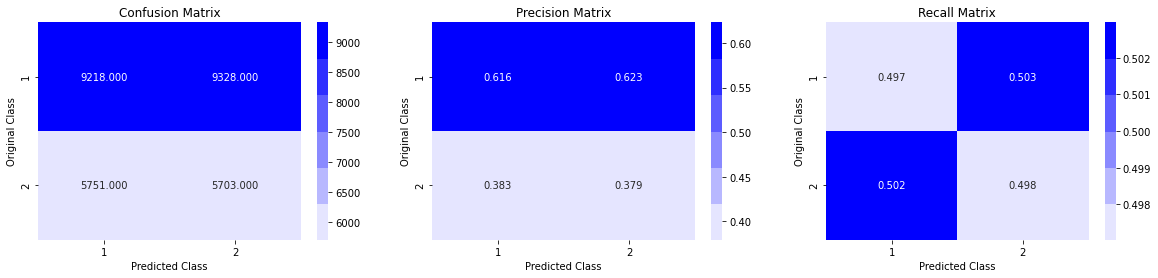

In [20]:
#we are generating random model with 9 random values that would sum upto 1.
#for that we generate 9 random numbers divide each by their total sum to get 9 numbers.
#We create outut array that has exactly same size as the CV/test data
#Taking randomly generated values as predicted values to generate Random Model

predicted_y = np.zeros((test_len,2))
for i in tnrange(test_len):
  rand_probs = np.random.rand(1,2)
  predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

#calculating log loss
print('Log loss on Test Data using Random Model : {}'.format(log_loss(Y_test,predicted_y,eps=1e-15)))

predicted_y = np.argmax(predicted_y,axis=1)
plot_confusion_matrix(Y_test, predicted_y)

# 4.4 SGD Algos

* **Using Hyperopt**

##Functions

In [0]:
def save_best_model(model,save_name,regularizer):
  with open('/content/drive/My Drive/Colab Notebooks/Models/Quora/SGD_'+save_name+'_'+regularizer+'.pkl','wb') as SGD_pkl_file:
    pickle.dump(model, SGD_pkl_file)

In [0]:
def loss_df(search_space,trials):
  defaults = {'params' : search_space.keys()}
  params = defaults['params']
  #tid - size of data points
  results_df = pd.DataFrame(columns=['tid',*params,'status'])

  for t in trials.trials:
    result_dict = t['misc']['vals']
    #changing position list value as interger and assigning to same key
    result_dict = {k:v[0] for k,v in result_dict.items()}
    result_dict = space_eval(search_space,result_dict)
    result_dict['tid'] = t['tid']
    result_dict.update(t['result'])

    results_df = pd.concat([results_df,pd.DataFrame(result_dict,index=[0])],axis=0,ignore_index=True)
    #storing only those entries that have status 'ok
  results_df = results_df[results_df.status=='ok']
 
    #changing datatypes of columns which are having as 'object' to respectives
  results_df = results_df.infer_objects()
  indices = results_df.groupby('alpha')['loss'].idxmin()
  results_df = results_df.loc[indices].sort_values('alpha')

  return results_df

In [0]:
def opt_alpha_sgd_para(search_space):

  clf = SGDClassifier(alpha=search_space['alpha'], penalty=search_space['penalty'],loss=search_space['loss'], random_state=42)
  clf.fit(X_train,Y_train)
  sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
  sig_clf.fit(X_train,Y_train)
  #Predicting Y with test data
  Y_predict = sig_clf.predict_proba(X_test)
  #calculating log-loss
  #no need to store the log error as hyperopt default stores it
  log_error = log_loss(Y_test,Y_predict, labels = clf.classes_, eps = 1e-15)

  #below don't change the 'loss' to anyother as its used by fmin or anyother hyperopt functions.
  return {'loss' : log_error, 'status' : STATUS_OK}

In [0]:
def sgd_model_hyperopt(X_train, Y_train, X_test,Y_test,search_space,loss,regularizer,save_name):

  flag = False

  if os.path.exists('/content/drive/My Drive/Colab Notebooks/Models/Quora/SGD_'+save_name+'_'+regularizer+'.pkl'):
    with open('/content/drive/My Drive/Colab Notebooks/Models/Quora/SGD_'+save_name+'_'+regularizer+'.pkl','rb') as SGD_LOSS_PCKL:
      sig_clf = pickle.load(SGD_LOSS_PCKL)

  else:
    flag = True
    print('Saved file not found, Running the algorithm\n')
  
    #programe to trigger objective function for finding best alpha
    #Here divide the evaluation as all of the RAM is getting used
    #for the first 10 trials calculate the best, save trials in a picle file
    #for the next 10 trials, set trials = saved pickle and runt fmin again.
    #https://github.com/hyperopt/hyperopt/issues/267
    trials = SparkTrials(parallelism=2)
    best = fmin(fn=opt_alpha_sgd_para, 
            space=search_space, 
            algo=tpe.suggest, 
            max_evals=20, 
            trials = trials
           #,return_argmin=False
            )
  
    best_alpha = space_eval(search_space,best)['alpha']
    reg = space_eval(search_space,best)['penalty']

    print('\nBest alpha found is : ', best_alpha, '\n')
    print('\nPenalty is : ', reg, '\n')

    #train the model with found best alpha
    print('\nTraining model with found best alpha')
    clf = SGDClassifier(alpha=best_alpha, penalty = regularizer, loss = loss, random_state=42)
    clf.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, Y_train)

    #Saving best model of sig_clf
    best_SGD_LOG = sig_clf
    print('\nSaving the trained model with best alpha')
    save_best_model(best_SGD_LOG, save_name,regularizer)

    #below function returns the df of error
    error_df = loss_df(search_space,trials)
    #Saving log_error
    print('\nSaving the error file')
    error_df.to_parquet('/content/drive/My Drive/Colab Notebooks/Models/Quora/Error_'+save_name+'_'+regularizer+'.parquet.gzip',compression='gzip')
  
  #from here entire code is run irrespective of algo run

  #running below to get saved error file when algo is not ran
  if not flag:
    if os.path.exists('/content/drive/My Drive/Colab Notebooks/Models/Quora/Error_'+save_name+'_'+regularizer+'.parquet.gzip'):
      error_df= pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Models/Quora/Error_'+save_name+'_'+regularizer+'.parquet.gzip', engine='fastparquet')
      min_error_index = error_df['loss'].idxmin()
      best_alpha = error_df.loc[min_error_index]['alpha']
      print('\nBest alpha found from saved model : ', best_alpha,'\n')


  #plotting line plot of errors vs alpha
  f,ax = plt.subplots(figsize=(12,8))

  X_alpha = error_df['alpha']
  Y_log_ls = error_df['loss']

  sns.lineplot(x=X_alpha, y=Y_log_ls,markers=True)
  sns.scatterplot(x=X_alpha, y=Y_log_ls)

  for i,txt in enumerate(np.round(Y_log_ls,3)):
    ax.text(X_alpha.iloc[i],txt, (X_alpha.iloc[i],txt),fontsize=12)

  plt.grid()
  plt.title('Cross Validation Error for each alpha')
  plt.xlabel('Alpha i\'s')
  plt.ylabel('Error measure')
  plt.show()

  #Train log loss
  Y_predict_train = sig_clf.predict_proba(X_train)
  train_log_loss = log_loss(Y_train,Y_predict_train, labels=sig_clf.classes_, eps = 1e-15)
  print('For values of best alpha = ', best_alpha, '\nTrain log loss is :', train_log_loss, '\n')

  #Test log loss
  Y_predict_test = sig_clf.predict_proba(X_test) #returns array with probabilities of shape(len(X_test), no.classes)... all probabilites wrt each class
  test_log_loss = log_loss(Y_test,Y_predict_test, labels=sig_clf.classes_, eps = 1e-15)
  print('For values of best alpha = ', best_alpha, '\nTest log loss is :', test_log_loss, '\n')

  #Plotting confusion matrix
  predicted_Y = np.argmax(Y_predict_test,axis=1) # this gives positions of max values in each row 0:first column - class '0', 1:second column - class '1'
  print('Total number of test data points :', len(predicted_y),'\n')
  plot_confusion_matrix(Y_test, predicted_Y)

  #returning model to use further out of function if we want
  return sig_clf,error_df


## SGD Logistic Regression

Saved file not found, Running the algorithm

100%|██████████| 20/20 [07:21<00:00, 22.08s/trial, best loss: 0.48473325166936987]

Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.




Best alpha found is :  0.01 


Penalty is :  l2 


Training model with found best alpha

Saving the trained model with best alpha

Saving the error file


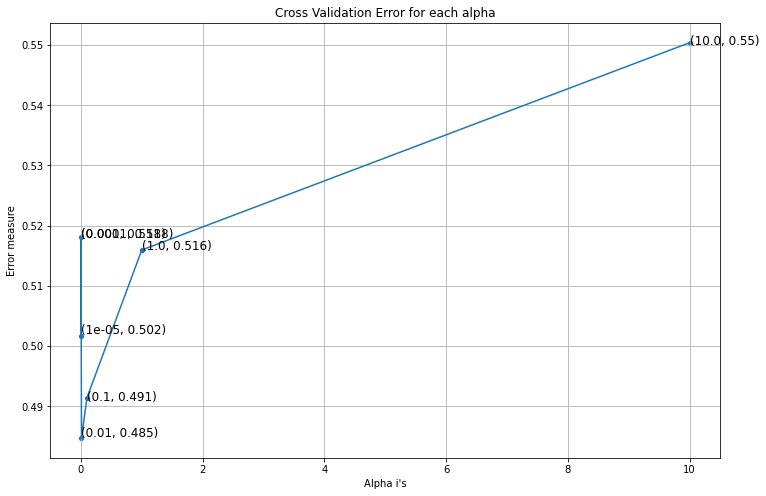

For values of best alpha =  0.01 
Train log loss is : 0.48557050273075186 

For values of best alpha =  0.01 
Test log loss is : 0.48473325166936987 

Total number of test data points : 30000 



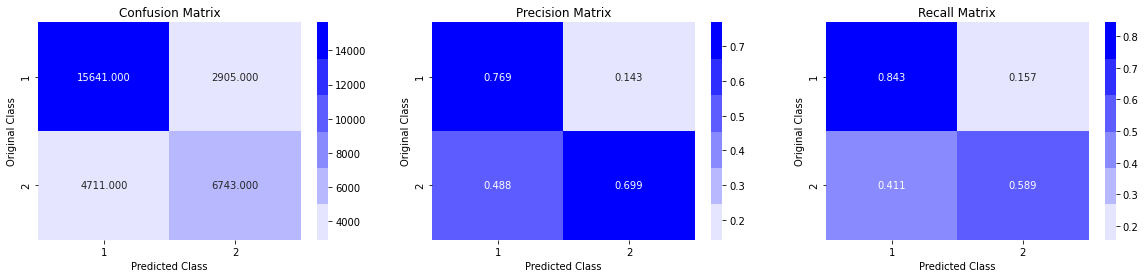

In [25]:
#driver program for logistic regression
#with l1 regularizer code took approx 6 hrs to complete 16% and also each iteration took 1000 sec
#so switching to l2 regularizer
#done using trials()

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l2']),
                'loss':hp.choice('loss',['log'])
                }

Log_regression,error_df = sgd_model_hyperopt(X_train, Y_train, X_test, Y_test,search_space,loss='log',regularizer='l2',save_name='Log_avg_TfidfWeighted')

Saved file not found, Running the algorithm

100%|██████████| 20/20 [07:57<00:00, 23.85s/trial, best loss: 0.4860346577127815]


Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.



Best alpha found is :  0.01 


Penalty is :  l1 


Training model with found best alpha

Saving the trained model with best alpha

Saving the error file


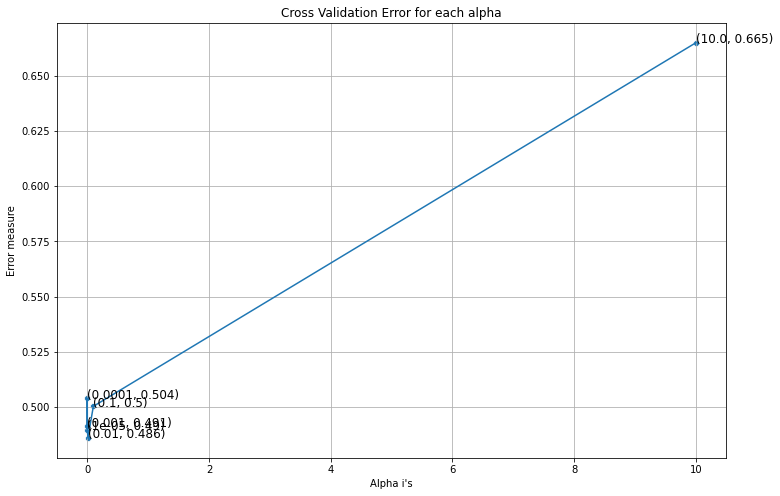

For values of best alpha =  0.01 
Train log loss is : 0.48705349035298007 

For values of best alpha =  0.01 
Test log loss is : 0.4860346577127815 

Total number of test data points : 30000 



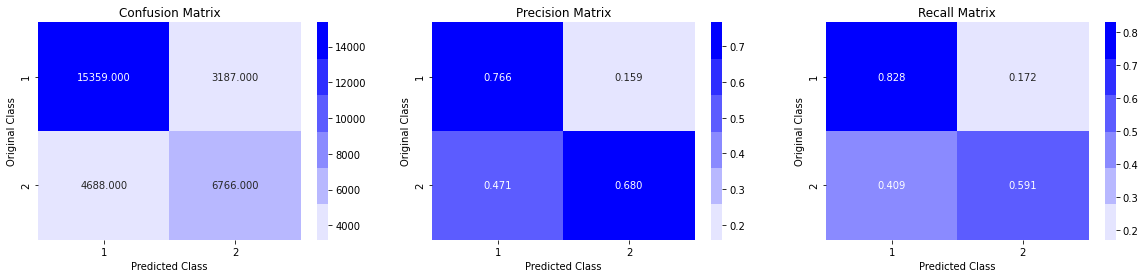

In [26]:
#SGD log loss with l1 Regularizer

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l1']),
                'loss':hp.choice('loss',['log'])
                }

Log_regression,error_df = sgd_model_hyperopt(X_train, Y_train, X_test, Y_test,search_space,loss='log',regularizer='l1',save_name='Log_avg_TfidfWeighted')

## 4.4 SGD using hinge Loss(LSVM) with hyperparameter tuning

Saved file not found, Running the algorithm

100%|██████████| 20/20 [05:43<00:00, 17.16s/trial, best loss: 0.48406323208582686]

Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.




Best alpha found is :  0.01 


Penalty is :  l2 


Training model with found best alpha

Saving the trained model with best alpha

Saving the error file


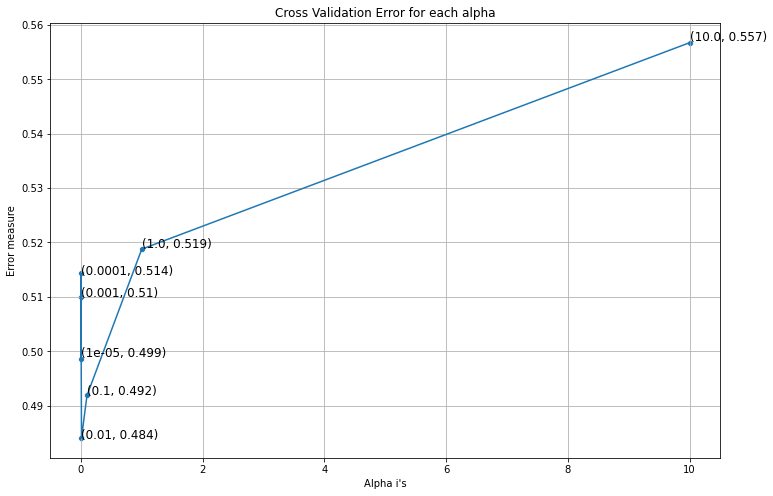

For values of best alpha =  0.01 
Train log loss is : 0.48446876469376343 

For values of best alpha =  0.01 
Test log loss is : 0.48406323208582686 

Total number of test data points : 30000 



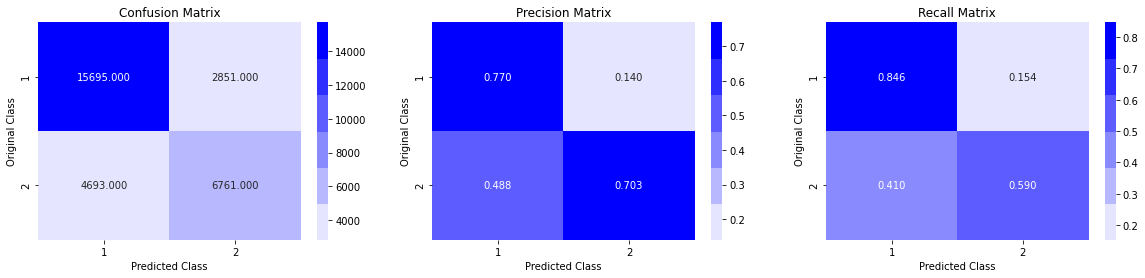

In [27]:
#driver program for linear SVM with l2 regularizer
#all trials got succeeded and done using sparktrials(parallelism=2)

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l2']),
                'loss':hp.choice('loss',['hinge'])
                }

Lr_SVM,error_df = sgd_model_hyperopt(X_train, Y_train, X_test, Y_test,search_space,loss='hinge',regularizer='l2',save_name='Hinge_avg_TfidfWeighted')

Saved file not found, Running the algorithm

100%|██████████| 20/20 [06:17<00:00, 18.90s/trial, best loss: 0.48595730344526783]


Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.



Best alpha found is :  0.01 


Penalty is :  l1 


Training model with found best alpha

Saving the trained model with best alpha

Saving the error file


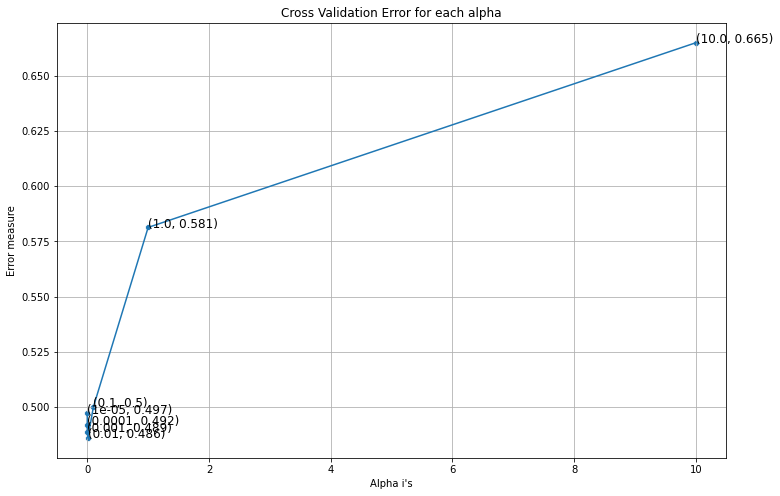

For values of best alpha =  0.01 
Train log loss is : 0.486169963724057 

For values of best alpha =  0.01 
Test log loss is : 0.48595730344526783 

Total number of test data points : 30000 



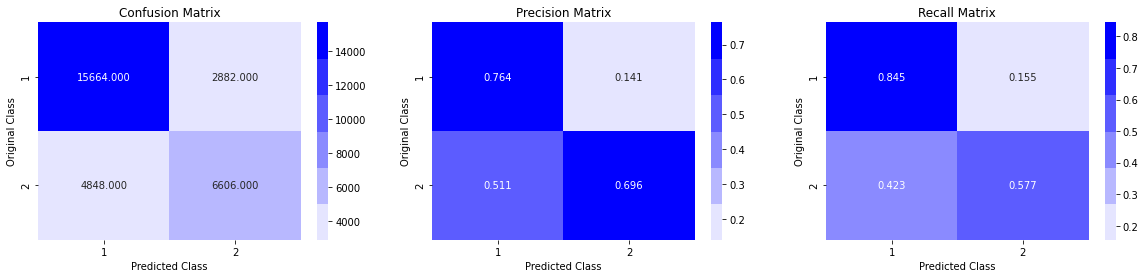

In [28]:
#driver program for linear SVM with l1 regularizer
#all trials got succeeded and done using sparktrials(parallelism=2)

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l1']),
                'loss':hp.choice('loss',['hinge'])
                }

Lr_SVM,error_df = sgd_model_hyperopt(X_train, Y_train, X_test, Y_test,search_space,loss='hinge',regularizer='l1',save_name='Hinge_avg_TfidfWeighted')